##     **Customer Churn Prediction Using ANN - Classification Problem**

![Customer Churn Prediction Using ANN.jpg](attachment:69e226a2-871f-4793-aa4e-f3d23443da32.jpg)

# **Import the Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# **Data Analysis & Visualization**

In [4]:
# read the dataset
df = pd.read_csv('/content/Churn_Modelling.csv')

# see the first five rows of df
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# see the shape of df
df.shape

(10000, 14)

In [6]:
# see the information of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# see the descriptive statistics of df
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# see the duplicates values in dataset if exist then remove otherwise not.
df.duplicated().sum()

0

In [10]:
# check the null values in the each columns of dataset if exist then remove otherwise not.
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
# drop the irrelevant columns
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace = True)

In [12]:
# check again the first five rows of df after drop the irrelevant columns
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
# check the value counts of "Geography" column.
df_geography = df['Geography'].value_counts()
df_geography

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<ipython-input-14-0576afbde503>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')


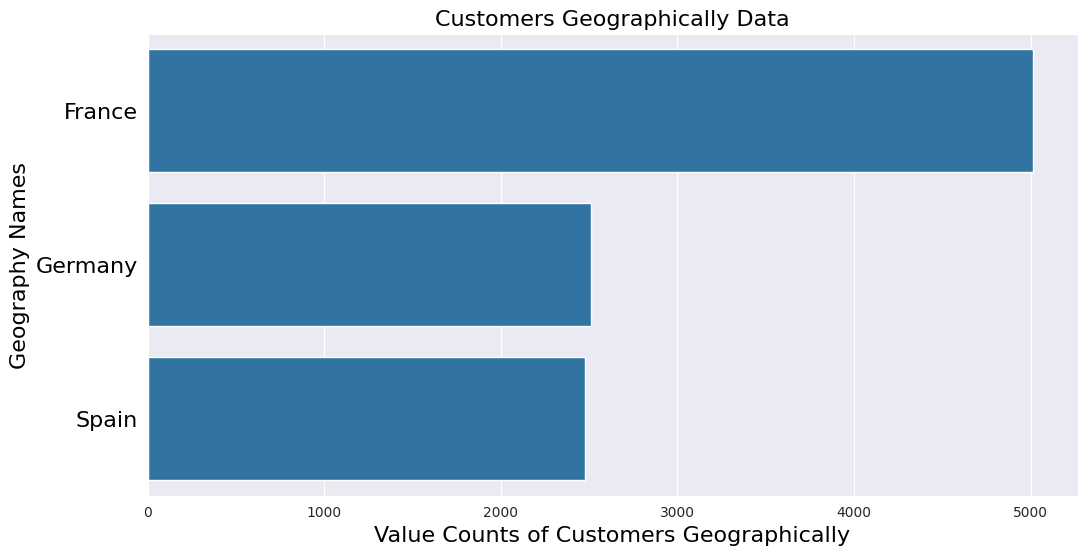

In [14]:
# let's perform univarient eda on "Geography" column.
plt.figure(figsize=(12,6))
res=sns.barplot(x=df_geography, y=df_geography.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.xlabel('Value Counts of Customers Geographically',fontsize = 16, color='black')
plt.ylabel('Geography Names',fontsize = 16, color='black')
plt.title('Customers Geographically Data',fontsize = 16, color='black')
plt.show()

In [15]:
# check the value counts of "Gender" column.
df_gender = df['Gender'].value_counts()
df_gender

Male      5457
Female    4543
Name: Gender, dtype: int64

<ipython-input-16-2e858522716d>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')


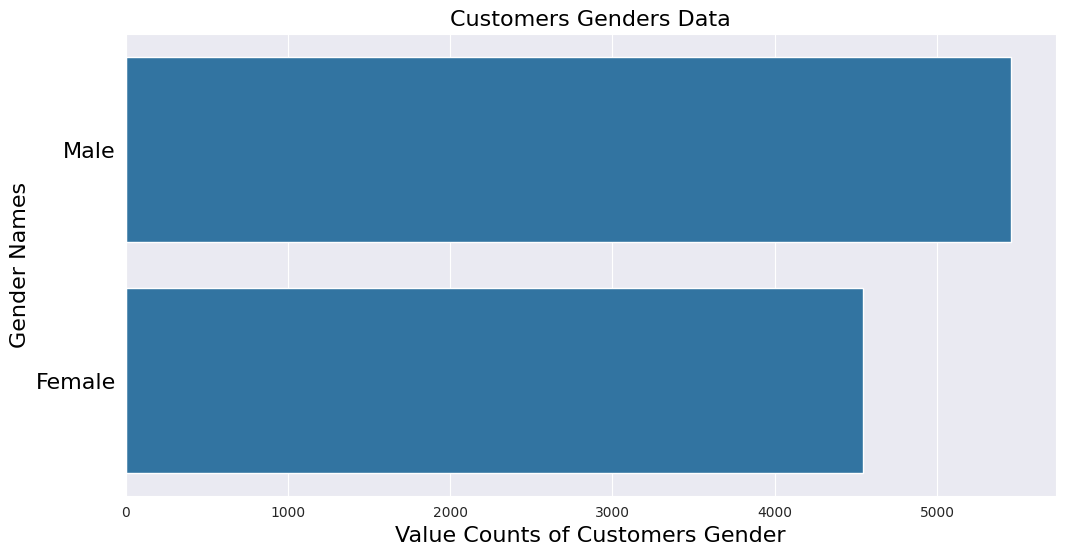

In [16]:
# let's perform univarient eda on "Gender" column.
plt.figure(figsize=(12,6))
res=sns.barplot(x=df_gender, y=df_gender.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.xlabel('Value Counts of Customers Gender',fontsize = 16, color='black')
plt.ylabel('Gender Names',fontsize = 16, color='black')
plt.title('Customers Genders Data',fontsize = 16, color='black')
plt.show()

In [17]:
# check the value counts of "number of products" column.
df_nop = df['NumOfProducts'].value_counts()
df_nop

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

<ipython-input-18-01a328d1d97d>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')


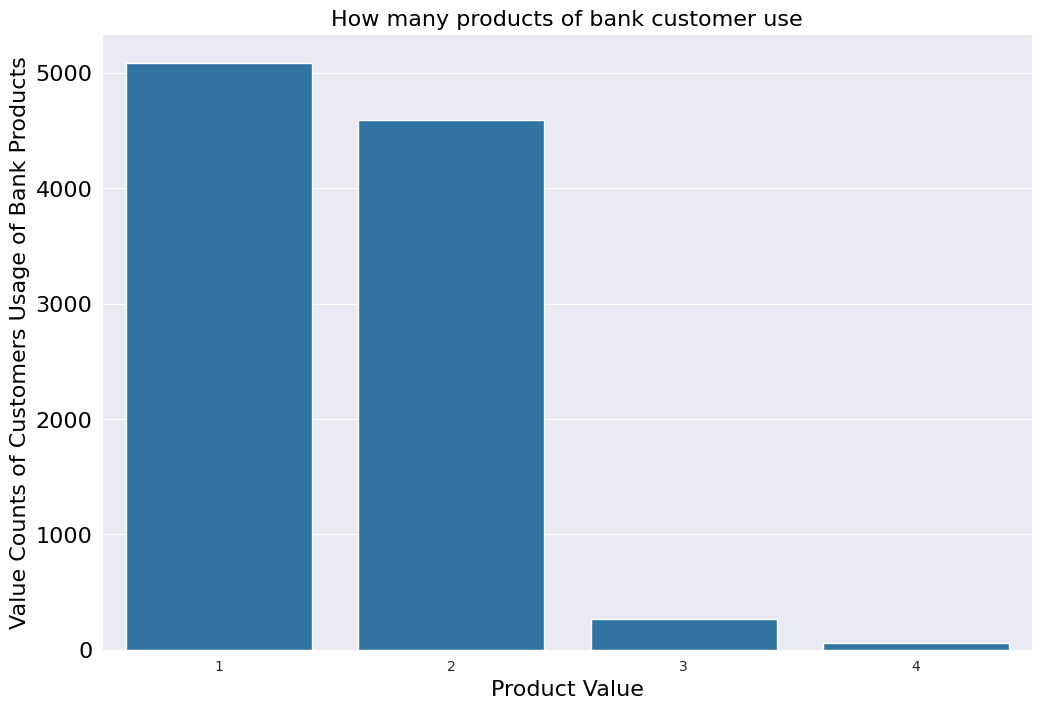

In [18]:

# let's perform univarient eda on "number of products" column.
plt.figure(figsize=(12,8))
res=sns.barplot(y=df_nop, x=df_nop.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('Value Counts of Customers Usage of Bank Products',fontsize = 16, color='black')
plt.xlabel('Product Value',fontsize = 16, color='black')
plt.title('How many products of bank customer use',fontsize = 16, color='black')
plt.show()

In [19]:
# check the value counts of "HasCrCard" column.
df_crc = df['HasCrCard'].value_counts()
df_crc

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [ ]:
# let's perform univarient eda on "HasCrCard" column.
plt.figure(figsize=(12,8))
res=sns.barplot(y=df_crc, x=df_crc.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('Value Counts of Customers Has a Credit Card or Not',fontsize = 16, color='black')
plt.xlabel('Customer have credit card or not',fontsize = 16, color='black')
plt.title('How many customers have credit cards',fontsize = 16, color='black')
plt.show()

In [21]:
# check the value counts of "IsActiveMember" column.
df_iam = df['IsActiveMember'].value_counts()
df_iam

1    5151
0    4849
Name: IsActiveMember, dtype: int64

<ipython-input-22-5c8e89f6ecd4>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')


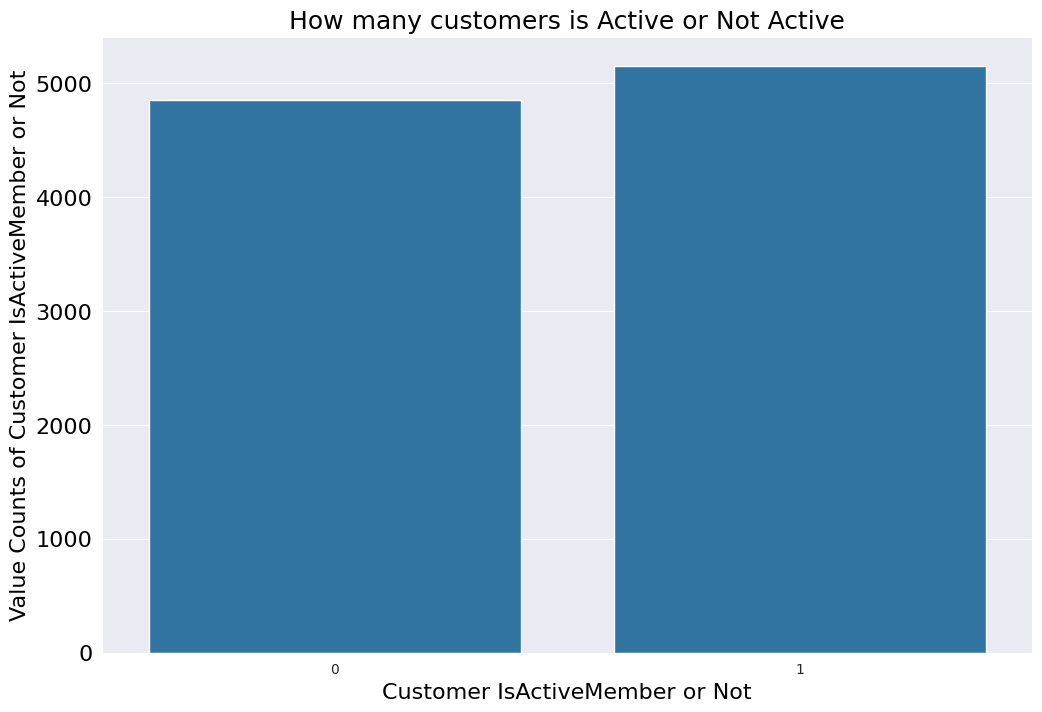

In [22]:
# let's perform univarient eda on "IsActiveMember" column.
plt.figure(figsize=(12,8))
res=sns.barplot(y=df_iam, x=df_iam.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('Value Counts of Customer IsActiveMember or Not',fontsize = 16, color='black')
plt.xlabel('Customer IsActiveMember or Not',fontsize = 16, color='black')
plt.title('How many customers is Active or Not Active',fontsize = 18, color='black')
plt.show()

In [23]:
# check the value counts of "Exited" target column.
df_exit = df['Exited'].value_counts()
df_exit

0    7963
1    2037
Name: Exited, dtype: int64

<ipython-input-24-277a1453c4b3>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')


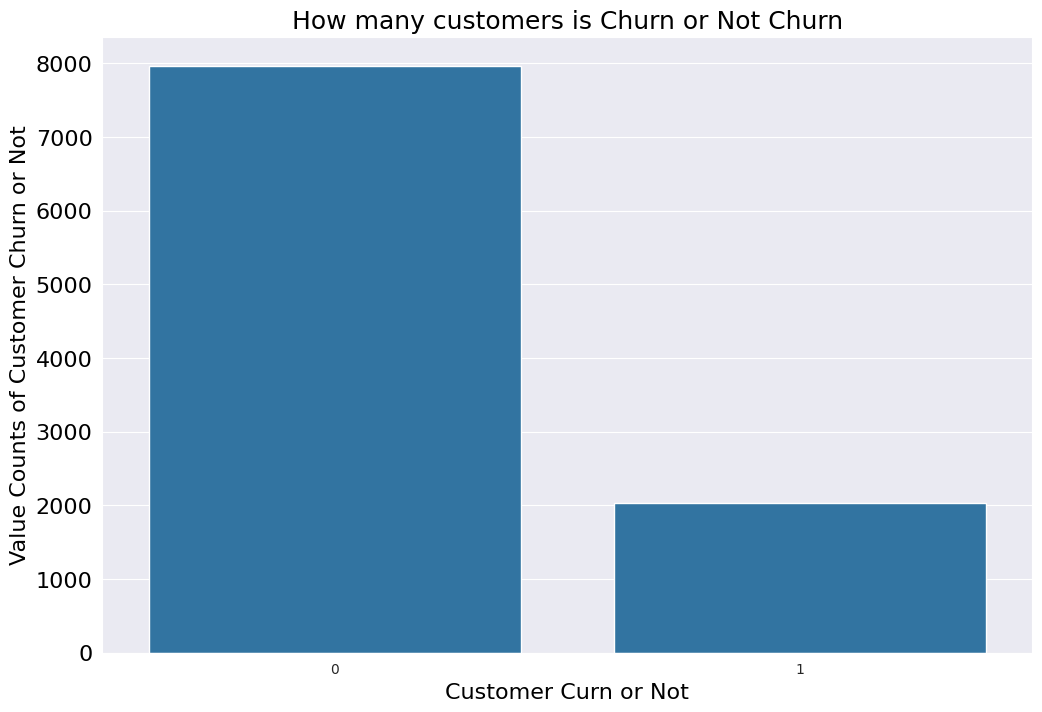

In [24]:
# # let's perform univarient eda on "Exited" target column.
plt.figure(figsize=(12,8))
res=sns.barplot(y=df_exit, x=df_exit.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('Value Counts of Customer Churn or Not',fontsize = 16, color='black')
plt.xlabel('Customer Curn or Not',fontsize = 16, color='black')
plt.title('How many customers is Churn or Not Churn',fontsize = 18, color='black')
plt.show()

# **Apply One Hot Encoding Technique on Gender & Geography Column**

In [25]:
# use pandas dummies funtion for one hot encodeing
df = pd.get_dummies(df, columns=["Gender", "Geography"], drop_first=True)

In [26]:
# check again the df after one hot encoding method apply
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


# **Let's Handle the Imbalanced Target Column and Balanced it**

In [27]:
# Separate majority and minority classes
majority_class = df[df['Exited'] == 0]
minority_class = df[df['Exited'] == 1]

# Upsample the minority class
upsampled_minority = resample(minority_class,
                              replace=True,  # Sample with replacement
                              n_samples=len(majority_class),  # Match the number of majority class samples
                              random_state=42)  # Set random state for reproducibility

# Combine the upsampled minority class with the majority class
balanced_data = pd.concat([majority_class, upsampled_minority])

In [28]:
# check the target_balanced_data
balanced_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5701,625,49,4,128504.76,1,1,0,126812.63,1,0,1,0
9337,466,47,5,102085.72,1,1,1,183536.24,1,0,1,0
4345,720,46,3,97042.60,1,1,1,133516.51,1,1,1,0
1085,803,42,5,0.00,1,1,0,196466.83,1,1,0,0


In [29]:
# see the duplicates values after the balancing the data and in dataset if exist then remove otherwise not.
df.duplicated().sum()

0

In [30]:
# check the null values after the balancing the data and in the each columns of dataset if exist then remove otherwise not.
df.isnull().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Gender_Male          0
Geography_Germany    0
Geography_Spain      0
dtype: int64

In [31]:
# check again the value counts of "Exited" target column after the balancing the data.
df_exit = balanced_data['Exited'].value_counts()
df_exit

0    7963
1    7963
Name: Exited, dtype: int64

<ipython-input-32-319fdf4266c7>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')


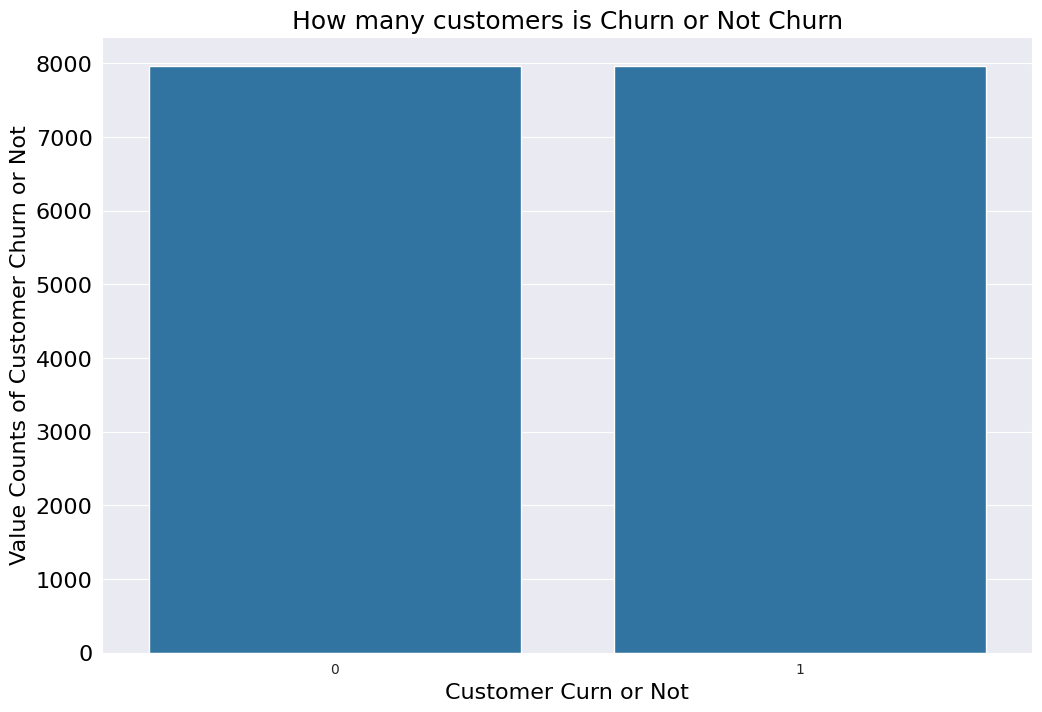

In [32]:
# # let's perform univarient eda on "Exited" target column after the balancing the data.
plt.figure(figsize=(12,8))
res=sns.barplot(y=df_exit, x=df_exit.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('Value Counts of Customer Churn or Not',fontsize = 16, color='black')
plt.xlabel('Customer Curn or Not',fontsize = 16, color='black')
plt.title('How many customers is Churn or Not Churn',fontsize = 18, color='black')
plt.show()

# **Split the Data for model Training and Testing**

In [33]:
# # split the feature in x variable and target varible in y variable
y = balanced_data['Exited']
X = balanced_data.drop('Exited',axis=1)

In [34]:
# use sklearn for train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
# check the shape of X_train & X_test, y_train & y_test
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape : ", y_test.shape)

X_train Shape :  (12740, 11)
X_test Shape :  (3186, 11)
y_train Shape :  (12740,)
y_test Shape :  (3186,)


### **Apply Sklearn Standard Scaler Technique for Standarized the Input Features Values**

In [36]:
# use sklearn standard scaler technique for standarized the input features values
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# check the X_train_scaled values
X_train_scaled

array([[ 1.74458075e+00,  2.64948525e-01,  1.02260197e+00, ...,
         9.74118179e-01, -6.65070356e-01, -5.47359263e-01],
       [ 1.24130320e+00,  7.61019204e-02,  8.82175645e-04, ...,
         9.74118179e-01, -6.65070356e-01, -5.47359263e-01],
       [ 8.06835512e-02, -1.83213817e-02,  1.02260197e+00, ...,
         9.74118179e-01,  1.50360032e+00, -5.47359263e-01],
       ...,
       [ 3.16915869e-01, -8.68131101e-01,  8.82175645e-04, ...,
        -1.02656949e+00, -6.65070356e-01, -5.47359263e-01],
       [ 4.60709454e-01, -4.90437892e-01, -3.39691089e-01, ...,
        -1.02656949e+00, -6.65070356e-01, -5.47359263e-01],
       [-2.68529441e-01, -1.12744684e-01,  1.70374850e+00, ...,
         9.74118179e-01, -6.65070356e-01, -5.47359263e-01]])

In [38]:
# check the X_est_scaled values
X_test_scaled

array([[ 0.46070945,  0.45379513, -1.02083762, ...,  0.97411818,
        -0.66507036,  1.82695364],
       [-1.34698133, -0.39601459,  1.02260197, ..., -1.02656949,
        -0.66507036, -0.54735926],
       [-1.19291677, -0.39601459, -1.36141088, ...,  0.97411818,
        -0.66507036,  1.82695364],
       ...,
       [-0.11446489, -1.0569777 ,  1.02260197, ...,  0.97411818,
         1.50360032, -0.54735926],
       [-1.0799361 , -0.7737078 ,  1.02260197, ...,  0.97411818,
         1.50360032, -0.54735926],
       [-2.4665171 , -0.39601459, -1.36141088, ...,  0.97411818,
        -0.66507036,  1.82695364]])

In [39]:
# see the shape of balanced data
balanced_data.shape

(15926, 12)

# **Model Building - Artificial - Neural - Network - ANN**

In [40]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim = 11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [43]:
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split=0.2)

Epoch 1/100
319/319 [==============================] - 2s 3ms/step - loss: 0.6455 - accuracy: 0.6197 - val_loss: 0.5929 - val_accuracy: 0.6888
Epoch 2/100
319/319 [==============================] - 1s 2ms/step - loss: 0.5757 - accuracy: 0.6946 - val_loss: 0.5579 - val_accuracy: 0.7127
Epoch 3/100
319/319 [==============================] - 1s 2ms/step - loss: 0.5474 - accuracy: 0.7204 - val_loss: 0.5283 - val_accuracy: 0.7422
Epoch 4/100
319/319 [==============================] - 1s 2ms/step - loss: 0.5163 - accuracy: 0.7435 - val_loss: 0.5003 - val_accuracy: 0.7563
Epoch 5/100
319/319 [==============================] - 1s 2ms/step - loss: 0.4924 - accuracy: 0.7572 - val_loss: 0.4813 - val_accuracy: 0.7657
Epoch 6/100
319/319 [==============================] - 1s 2ms/step - loss: 0.4777 - accuracy: 0.7648 - val_loss: 0.4711 - val_accuracy: 0.7755
Epoch 7/100
319/319 [==============================] - 1s 2ms/step - loss: 0.4692 - accuracy: 0.7680 - val_loss: 0.4647 - val_accuracy: 0.7759

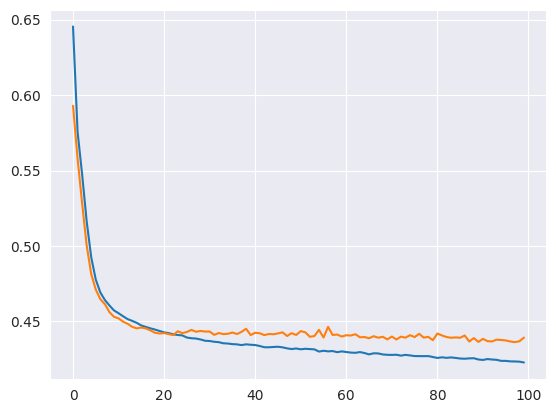

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

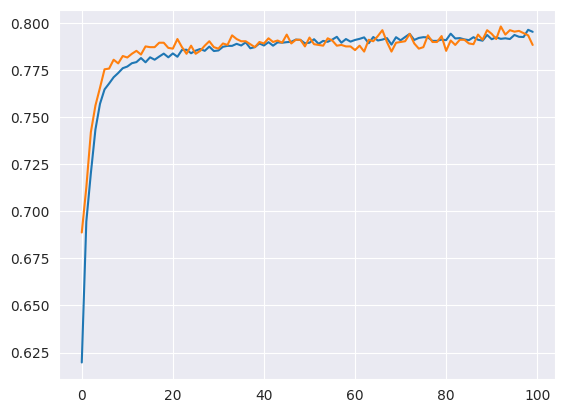

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [46]:
model.layers[0].get_weights()

[array([[-6.28534481e-02, -1.81914926e-01,  8.93209651e-02,
          6.76187053e-02,  3.06098163e-01,  4.51650321e-01,
          6.00701384e-03,  9.50061202e-01,  8.62477496e-02,
          1.83905393e-01,  3.55158299e-01],
        [ 2.57415026e-02,  6.61118090e-01, -2.87584424e-01,
         -8.11394691e-01,  1.29527760e+00,  1.73218966e-01,
         -7.30430484e-01, -7.77415216e-01, -1.75460130e-01,
          2.69846302e-02, -2.40507856e-01],
        [ 3.13208342e-01,  5.56930482e-01, -2.47517616e-01,
          4.88498285e-02,  1.39428362e-01, -2.59883404e-01,
          2.61717319e-01, -4.90718931e-01, -3.35171670e-02,
          1.93800882e-01, -8.91179815e-02],
        [-2.21106127e-01,  3.85098904e-01,  4.34104353e-02,
          1.19607821e-01,  1.92454383e-01,  4.94186342e-01,
         -1.97265044e-01, -1.19090891e-02,  2.99088299e-01,
         -6.38546824e-01, -1.11739767e+00],
        [ 2.59874135e-01,  6.17611170e-01,  1.48993778e+00,
         -8.59331340e-06,  5.01483500e-01,  

In [47]:
model.layers[1].get_weights()

[array([[ 0.11607865,  0.2633959 ,  0.15422967,  0.36398342,  0.77064973,
          0.17427836,  0.5157012 ,  0.25675917,  0.13005458,  0.7535095 ,
         -0.32338527],
        [-0.5775604 ,  0.1829174 ,  0.3392779 ,  0.1072991 , -0.13382404,
         -0.8625274 ,  0.15437707, -0.30949292,  0.17853983,  0.16894609,
         -0.8786828 ],
        [-0.7201064 ,  0.24180198,  0.79778975,  0.11611094, -0.2584413 ,
          0.08301112, -0.38925833,  0.18780681, -1.7415727 , -0.21989729,
          0.13661669],
        [ 0.14926603, -0.91075104, -0.3714032 , -1.1375252 , -0.05720111,
         -0.5933282 ,  0.45047507,  0.05544053, -0.52736247, -0.04105151,
          0.01081384],
        [ 0.53830034,  0.39160827,  0.07321264,  0.20506583, -0.32901806,
          0.04325759,  0.9426704 , -0.8767363 , -0.22534028, -0.98415434,
         -0.24579433],
        [ 0.3998971 ,  0.03693913,  0.30656508,  0.3813808 , -0.37957028,
          0.17555085,  0.19962482,  0.4019414 , -0.1853754 , -1.3151698

In [48]:
y_log = model.predict(X_test_scaled)

100/100 [==============================] - 0s 1ms/step


In [49]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [50]:
accuracy_score(y_test, y_pred)

0.7824858757062146

# **Thanks for Reading my Notebook**